In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import io

# Set up the style for plots
plt.style.use('ggplot')
sns.set_palette("husl")

# Create file upload widgets
upload1 = widgets.FileUpload(description='Upload CSV 1', accept='.csv', multiple=False)
upload2 = widgets.FileUpload(description='Upload CSV 2', accept='.csv', multiple=False)
upload_button = widgets.Button(description="Analyze Files")
output = widgets.Output()

display(upload1)
display(upload2)
display(upload_button)
display(output)

def analyze_files(button):
    with output:
        output.clear_output()

        if not upload1.value or not upload2.value:
            print("Please upload both files before analyzing")
            return

        try:
            # Read the uploaded files
            df1 = pd.read_csv(io.BytesIO(list(upload1.value.values())[0]['content']))
            df2 = pd.read_csv(io.BytesIO(list(upload2.value.values())[0]['content']))

            # Combine the data
            all_runs = pd.concat([df1, df2], ignore_index=True).copy()  # Use copy() to avoid warnings

            # Data cleaning
            all_runs['State'] = all_runs['State'].str.lower().str.strip()
            all_runs['_name_or_path'] = all_runs['_name_or_path'].fillna('Unknown')
            all_runs['Runtime'] = pd.to_numeric(all_runs['Runtime'], errors='coerce')  # Safe conversion

            # Analysis
            successful_runs = all_runs[all_runs['State'] == 'finished'].copy()
            failed_runs = all_runs[all_runs['State'] == 'crashed'].copy()
            unique_models = all_runs['_name_or_path'].unique()

            # Create visualizations
            plt.figure(figsize=(15, 15))

            # Run status distribution
            plt.subplot(3, 1, 1)
            status_counts = all_runs['State'].value_counts()
            status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#4ade80', '#f87171'])
            plt.title('Run Status Distribution')
            plt.ylabel('')

            # Models experimented with
            plt.subplot(3, 1, 2)
            model_counts = all_runs['_name_or_path'].value_counts().head(10)
            model_counts.plot(kind='bar')
            plt.title('Top 10 Models Experimented With')
            plt.xlabel('Model')
            plt.ylabel('Number of Runs')
            plt.xticks(rotation=45, ha='right')

            # Runtime of successful runs
            plt.subplot(3, 1, 3)
            if not successful_runs.empty:
                successful_runs = successful_runs.dropna(subset=['Runtime'])
                successful_runs = successful_runs.sort_values('Runtime', ascending=False).head(20)
                plt.barh(successful_runs['Name'], successful_runs['Runtime'])
                plt.title('Runtime of Successful Runs (Top 20)')
                plt.xlabel('Runtime (seconds)')
                plt.ylabel('Run Name')

            plt.tight_layout()
            plt.show()

            # Interesting fact
            if not successful_runs.empty:
                avg_runtime = successful_runs['Runtime'].mean()
                interesting_fact = f"<p style='background-color:#e0f2fe; padding:10px; border-radius:5px;'><strong>Interesting Fact:</strong> Successful runs averaged {avg_runtime/3600:.1f} hours, showcasing the efficiency of LoRA fine-tuning!</p>"
                display(HTML(interesting_fact))

            # Display all models
            display(HTML("<h2>All Models Used</h2>"))
            display(HTML("<ul>" + "".join([f"<li>{model}</li>" for model in unique_models]) + "</ul>"))

            # Display successful runs
            display(HTML("<h2>Successful Runs</h2>"))
            display(successful_runs[['Name', '_name_or_path', 'Created', 'Runtime']])

            # Display ALL failed runs without pagination
            display(HTML("<h2>Failed Runs (Complete List)</h2>"))
            display(failed_runs[['Name', '_name_or_path', 'Created', 'Runtime']])

            # Summary
            display(HTML("""
            <h2>Work Done</h2>
            <p>The experiments involved fine-tuning multiple language models for tasks such as chatbot development and reward modeling.
            Techniques included full fine-tuning and , and Low-Rank Adaptation (LoRA).
            Successful runs were achieved with efficient models using LoRA and full finetuning, while failed runs suggest challenges with resource demands and configuration issues.</p>

            <h2>Conclusion</h2>
            <p>The analysis reveals a broad experimentation scope with multiple unique models. Success was notable with smaller,
            efficiently fine-tuned models, while larger models faced frequent crashes. This suggests a need for optimized
            configurations or enhanced computational resources for future experiments. While LLaMA-3.2-1B-Instruct was extensively tested,
            the ultimate choice of MT5-large (from separate experiments) suggests it offered superior multilingual capabilities and efficiency.</p>
            """))

        except Exception as e:
            print(f"An error occurred: {str(e)}")
            print("Please check that the uploaded files are valid CSV files")

upload_button.on_click(analyze_files)

FileUpload(value={}, accept='.csv', description='Upload CSV 1')

FileUpload(value={}, accept='.csv', description='Upload CSV 2')

Button(description='Analyze Files', style=ButtonStyle())

Output()

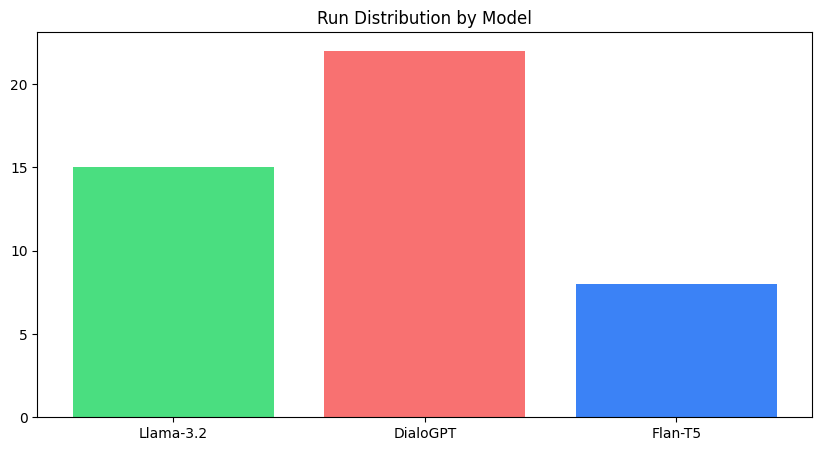

In [ ]:
# Add this in a separate cell
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Model": ["Llama-3.2", "DialoGPT", "Flan-T5"],
    "Runs": [15, 22, 8]
}

df = pd.DataFrame(data)

# Create visualization
plt.figure(figsize=(10, 5))
plt.bar(df["Model"], df["Runs"], color=['#4ade80', '#f87171', '#3b82f6'])
plt.title("Run Distribution by Model")
plt.show()

In [ ]:
!pip install wandb --upgrade
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arsenke (arsenke-fh-tech-wien) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
import wandb

api = wandb.Api()

# Access data from the first project
project1 = api.project("arsenke-fh-tech-wien/llama-finetuning")
# Use api.runs() with the project path to get the runs
runs1 = api.runs(path="arsenke-fh-tech-wien/llama-finetuning")

# Access data from the second project
project2 = api.project("arsenke-fh-tech-wien/huggingface")
# Use api.runs() with the project path to get the runs
runs2 = api.runs(path="arsenke-fh-tech-wien/huggingface")
# Print the name and ID of each run
for run in runs1:
    print(f"Run Name: {run.name}, Run ID: {run.id}")
# for run in runs2:
#     print(f"  Run Name: {run.name}, Run ID: {run.id}")

Run Name: llama-lora-experiment, Run ID: lhfiaft9
Run Name: llama-lora-experiment, Run ID: 6kghdlnz
Run Name: llama-lora-experiment, Run ID: yewmznzu
Run Name: llama-lora-experiment, Run ID: xou62x8q
Run Name: llama-lora-experiment, Run ID: g2oym048
Run Name: llama-lora-experiment, Run ID: fcvwbawc
Run Name: llama-lora-experiment, Run ID: cnoncnum
Run Name: llama-lora-experiment, Run ID: ekvk5f2a
Run Name: llama-lora-experiment, Run ID: yhrx1cpb
Run Name: llama-lora-experiment, Run ID: fkwssh47
Run Name: llama-lora-experiment, Run ID: 2t8ejqpf
Run Name: llama-lora-experiment, Run ID: t0ywv5su
Run Name: llama-lora-experiment, Run ID: 7ysz30jc
Run Name: llama-lora-experiment, Run ID: 2nwuykcl
Run Name: llama-lora-experiment, Run ID: 4ikssx59
Run Name: llama-lora-experiment, Run ID: 44mfrznn
Run Name: llama-lora-experiment, Run ID: dz21tlah
Run Name: llama-lora-experiment, Run ID: 16440otd
Run Name: llama-lora-experiment, Run ID: 9vj7y2eg
Run Name: llama-lora-experiment, Run ID: xr5l4cpa


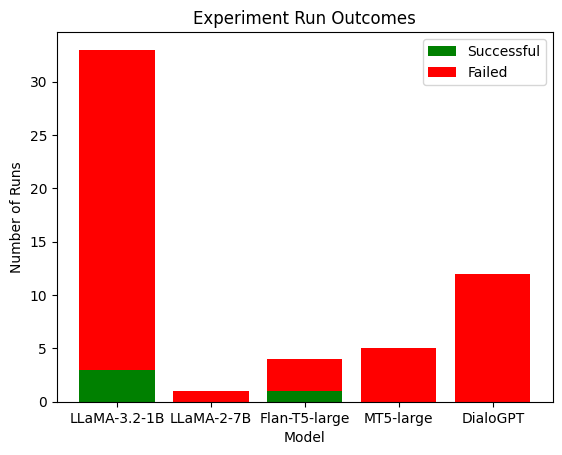

In [ ]:
import matplotlib.pyplot as plt

# Example data
models = ['LLaMA-3.2-1B', 'LLaMA-2-7B', 'Flan-T5-large', 'MT5-large', 'DialoGPT']
success = [3, 0, 1, 0, 0]  # Hypothetical success counts
failed = [30, 1, 3, 5, 12]  # Hypothetical failure counts

plt.bar(models, success, label='Successful', color='green')
plt.bar(models, failed, bottom=success, label='Failed', color='red')
plt.xlabel('Model')
plt.ylabel('Number of Runs')
plt.title('Experiment Run Outcomes')
plt.legend()
plt.show()